<a href="https://colab.research.google.com/github/rajy4683/S10EVA4/blob/master/S10EVA4_GCAM_LRF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **[RekogNizer library](https://github.com/rajy4683/RekogNizer.git) contains the following files:**
```
1. basemodelclass.py:   Contains core model definitions. 
2. fileutils.py:        Contains utility functions for model_name_generation, plotting functions 
3. dataloader.py:       Contains dataloaders for both training and test data
4. traintest.py:        Contains core training, test and model execution flow routines. 
5. logger.py:           Contains functions to handle WANDB integration
6. hyperparams.py:      Contains values of default hyperparameters alongwith getter and setter functions   
7. train_s7_new.py:     Main wrapper script or point of entry. It parses hyperparameters as arguments
8. requirements.txt:    Specific libraries that need to be available in the environment
```








#### Downloading and installing dependencies from the GitHub link:


In [0]:
!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [2]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

In [3]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-94glwmki
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-94glwmki
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=fd5655a6cc04321ffb7875e069e4eef32e3efe974b8047df359b4ae4c2c1635d
  Stored in directory: /tmp/pip-ephem-wheel-cache-d5lmdstm/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [4]:
!pip install --upgrade pyforest

Requirement already up-to-date: pyforest in /usr/local/lib/python3.6/dist-packages (1.0.2)


In [5]:
!python -m pyforest install_extensions

Starting to install pyforest extensions for Jupyter Notebook and Jupyter Lab

Trying to install pyforest nbextension...

Finished installing the pyforest Jupyter Notebook nbextension
Please reload your Jupyter notebook browser window

Trying to install pyforest labextension...
Could not install pyforest Jupyter Lab extension because Jupyter Lab is not available

Finished installing the pyforest Jupyter extensions
Please reload your Jupyter notebook and/or Jupyter lab browser windows


#### WANDB client login

In [6]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

In [0]:
#!cp /content/drive/My\ Drive/EVA4/RekogNizer/train_s8_new.py /content/drive/My\ Drive/EVA4/RekogNizer/train_s9_new.py

train_s8_new.py currently can take JSON formatted string as input. Following parameters are configurable and are used in the model training and execution.
```
{"project": "news5", 
 "sched_lr_gamma": 0.5, 
 "no_cuda": false, 
 "dropout": 0.1, 
 "test_batch_size": 128, 
 "batch_size": 128, 
 "epochs": 45, 
 "bias": false, 
 "lr": 0.001, 
 "start_lr": 0, 
 "sched_lr_step": 1, 
 "weight_decay": 0.0, 
 "seed": 1, 
 "momentum": 0.9}

```


## LR Finder

In [0]:
%autoreload 2
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader
from RekogNizer import lrfinder


import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


from RekogNizer import hyperparams
hyper_param_values = {
                      "lr":0.21694816106338752,
                      "dropout":0.1, 
                      "momentum":0.7062620648684866, 
                      "epochs":100, 
                      "weight_decay":0.00015753761358641488
                      }
hyperparams.set_hyperparam(hyper_param_values)

trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()

Files already downloaded and verified
Files already downloaded and verified


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()
LR plotting in progress


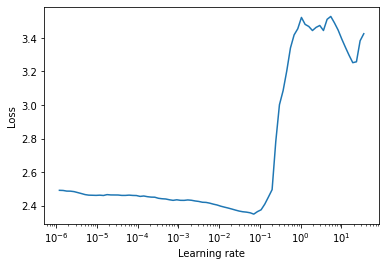

In [0]:
from RekogNizer import dataloader

model_new = basemodelclass.ResNet18(hyperparams.hyperparameter_defaults['dropout'])

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_new.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = lrfinder.LRFinder(model_new, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100, step_mode="exp")


lr_finder.plot()
lr_finder.reset()

In [0]:
lr_finder.history['lr'][np.argmin(lr_finder.history['loss'])]

0.07079457843841382

#### Cutout + Horizontal Flip

In [9]:
!python /content/drive/My\ Drive/EVA4/RekogNizer/train_s9_new.py -p '{"lr":0.07079457843841382,"dropout":0.1, "momentum":0.9, "epochs":50, "weight_decay":0.00015753761358641488}'

Setting  lr  =  0.07079457843841382
Setting  dropout  =  0.1
Setting  momentum  =  0.9
Setting  epochs  =  50
Setting  weight_decay  =  0.00015753761358641488
Final Hyperparameters
             dropout : 0.1 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.07079457843841382 
            momentum : 0.9 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.00015753761358641488 
             project : news5 
Files already downloaded and verified
Files already downloaded and verified
Initializing datasets and dataloaders
wandb: Tracking run with wandb version 0.8.29
wandb: Run data is saved locally in wandb/run-20200319_181047-1geiy27d
wandb: Syncing run earthy-cosmos-894
wandb: ⭐️ View project at https://app.wandb.ai/rajy4683/news5
wandb: 🚀 View run at https://app.wandb.ai/rajy4683/news5/runs/1

### Cutout + Horizontal Flip + MotionBlur

In [0]:
!python /content/drive/My\ Drive/EVA4/RekogNizer/train_s9_new.py -p '{"lr":0.21694816106338752,"dropout":0.1, "momentum":0.7062620648684866, "epochs":100, "weight_decay":0.00015753761358641488}'

#### The APIs for inferencing and plotting are moved out of the training script.


In [0]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

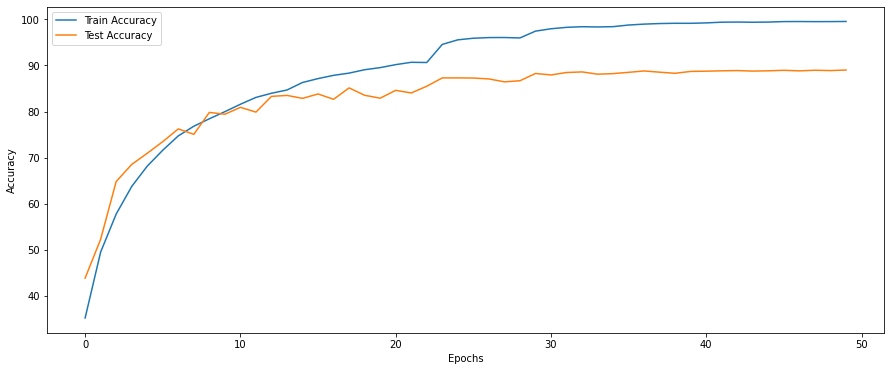

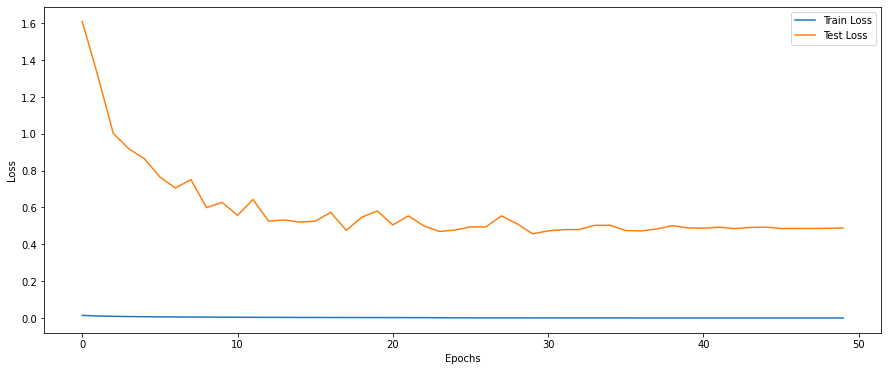

In [11]:
run_list = ['rajy4683/news5/runs/1geiy27d']
runs_df = logger.get_wandb_dataframes(run_list=run_list)#(project="rajy4683/news5",count=1)
new_df = pd.DataFrame().append(runs_df)


fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

In [14]:
%load_ext autoreload
%autoreload 2
from RekogNizer import traintest
import torchvision.transforms as transforms
import torchvision

my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-2fed3aae8a.h5")
#class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, classes, device=torch.device("cpu"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from RekogNizer import hyperparams
transform_test = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                    download=True, transform=transform_test)
testloader = dataloader.get_dataloader(testset, hyperparams.hyperparameter_defaults['batch_size'], shuffle=False, num_workers=2)
class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, dataloader.classes, device=torch.device("cuda"))

Files already downloaded and verified
Accuracy of plane : 86 %
Accuracy of   car : 96 %
Accuracy of  bird : 81 %
Accuracy of   cat : 70 %
Accuracy of  deer : 88 %
Accuracy of   dog : 78 %
Accuracy of  frog : 90 %
Accuracy of horse : 90 %
Accuracy of  ship : 92 %
Accuracy of truck : 92 %


<BarContainer object of 10 artists>

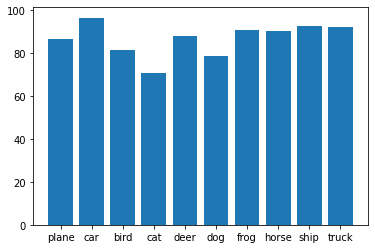

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])

## Misclassfied Images

Files already downloaded and verified
Files already downloaded and verified
1947
(1947,)
80.53 -10.958985766601563


<Figure size 720x720 with 0 Axes>

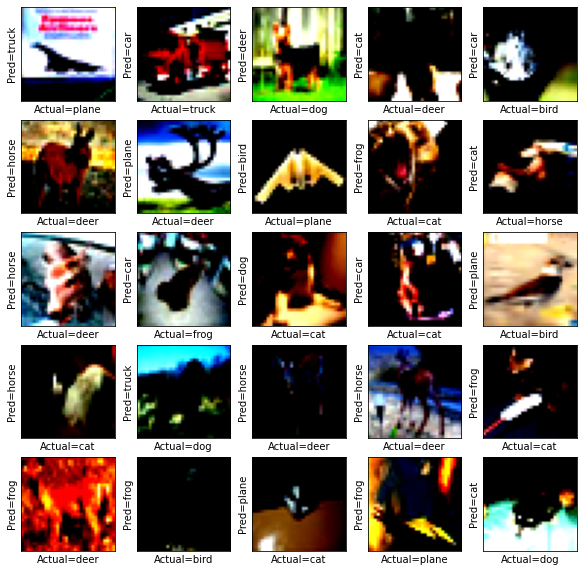

In [19]:
from RekogNizer import traintest
type(my_model)
classes = dataloader.classes
trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()
epoch_test_acc,epoch_test_loss,error_images, preds, actuals = traintest.plot_misclassified(None, my_model.to(torch.device("cuda")), torch.device("cuda"), testloader, classes,1)
print(epoch_test_acc,epoch_test_loss)

fig = plt.figure(figsize=(10,10))
for idx in np.arange(25):
    ax = fig.add_subplot(5, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(error_images[idx].cpu().numpy(), (1, 2, 0)))
    #ax.set_title("Pred="+str(np.int(preds[idx])))
    #ax.set(ylabel="Pred="+str(np.int(preds[idx])), xlabel="Actual="+str(np.int(actuals[idx])))
    ax.set(ylabel="Pred="+classes[np.int(preds[idx])], xlabel="Actual="+classes[np.int(actuals[idx])])

# GRADCAM Visualizations

In [0]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision.utils import make_grid, save_image

from RekogNizer.gradcam2 import *

## GradCAM for 25 misclassified images

saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


/content/drive/My Drive/EVA4/RekogNizer/gradcam2.py:24: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


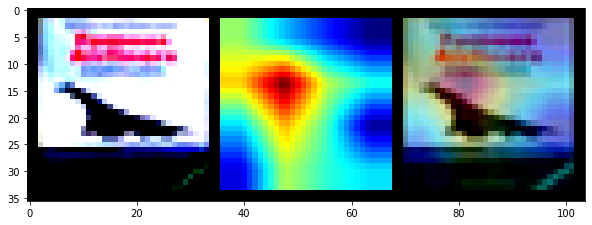

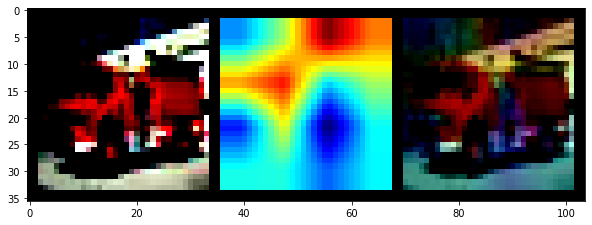

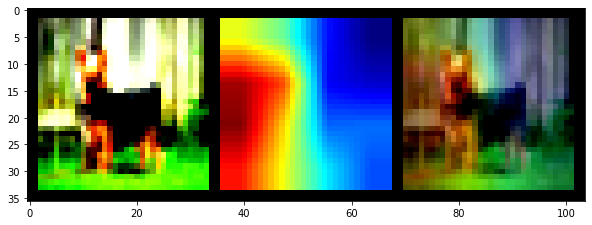

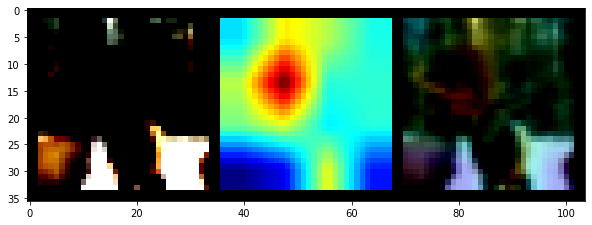

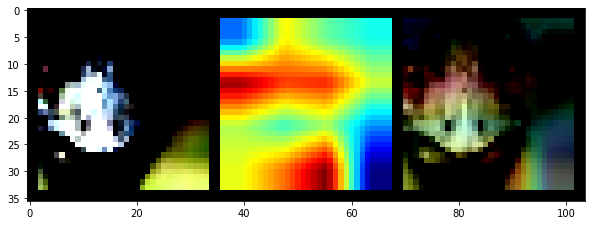

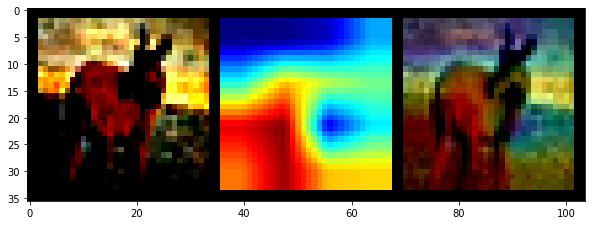

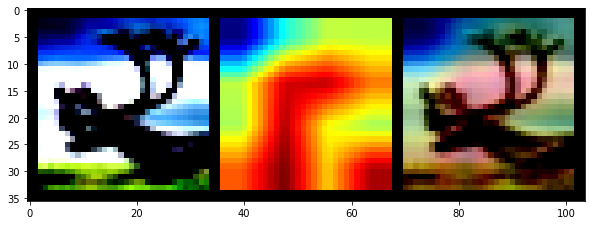

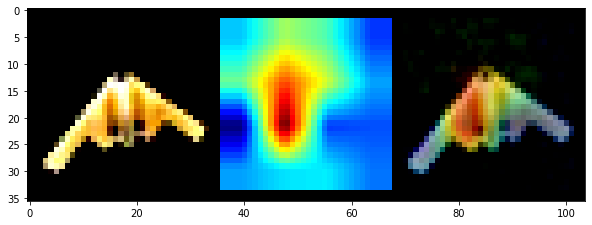

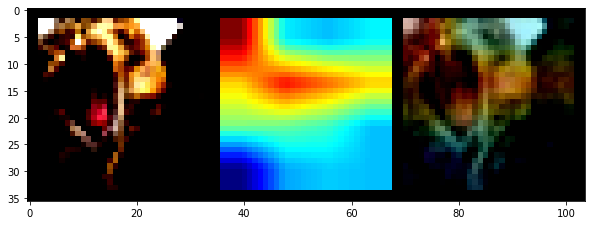

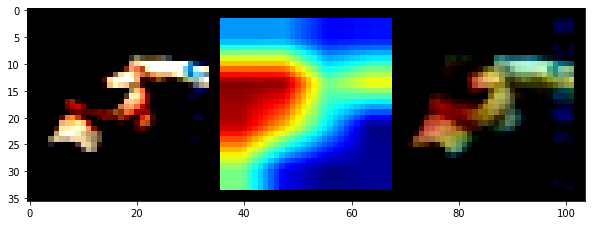

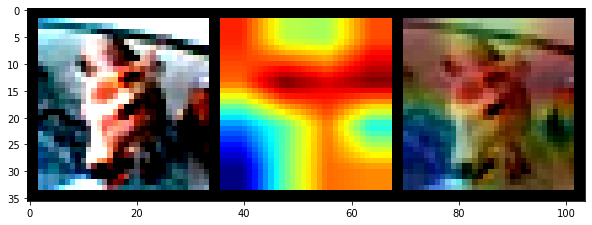

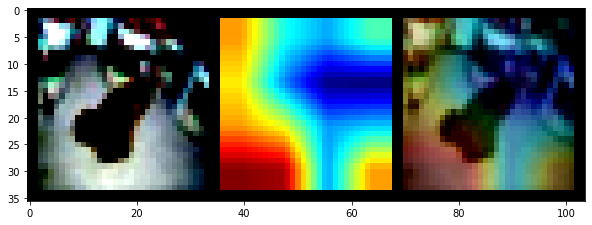

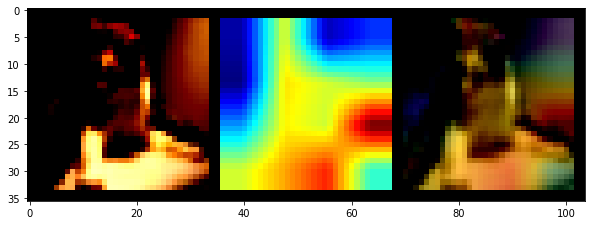

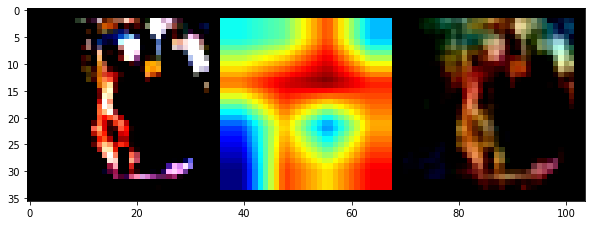

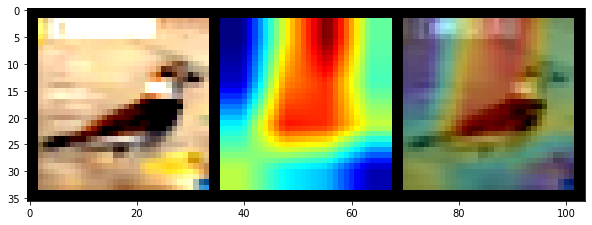

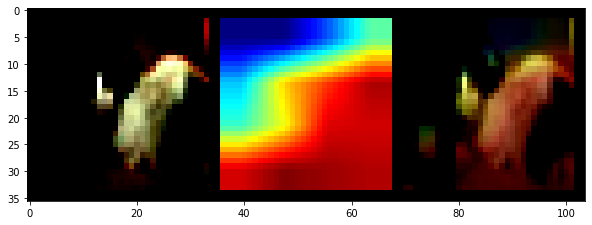

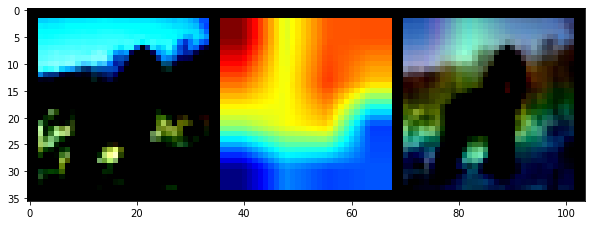

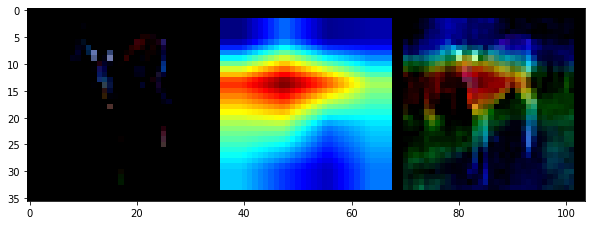

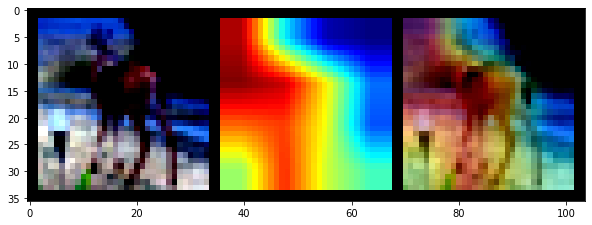

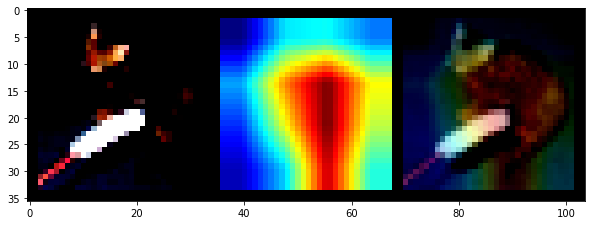

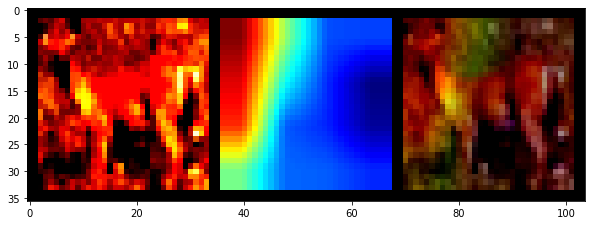

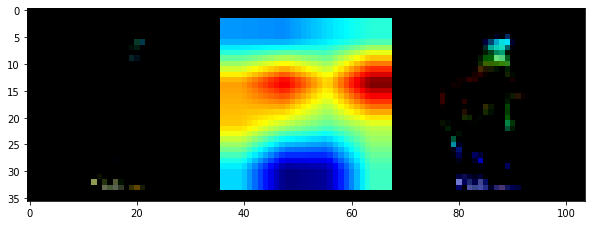

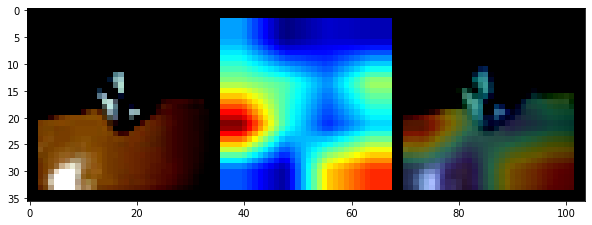

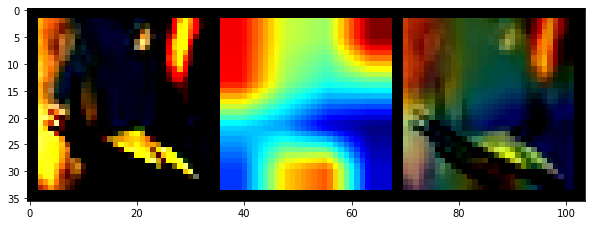

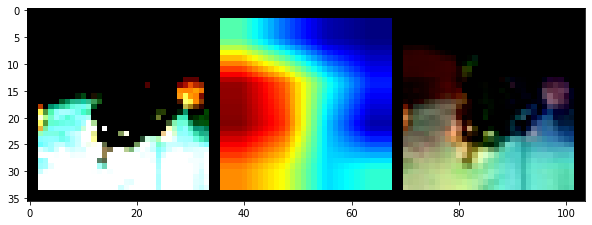

In [23]:
resnet_model_dict = dict(type='resnet', arch=my_model.to(torch.device("cpu")), layer_name='layer4', input_size=(32, 32))
for image in error_images[:25]:
    visualize_gradcam_image(resnet_model_dict,image, mean=[0.4827, 0.4724, 0.4427], std=[0.2482, 0.2501, 0.2698])